# Librerías

###  Básicas
- **`pandas`**: Herramienta para la manipulación y análisis de datos, especialmente útil para trabajar con datos tabulares (DataFrames).
- **`matplotlib.pyplot`**: Biblioteca para la creación de gráficos y visualizaciones.

---

### Métricas de Evaluación
- **`mean_squared_error`**: Calcula el error cuadrático medio (MSE), una métrica para evaluar la diferencia promedio cuadrada entre los valores reales y predichos.
- **`mean_absolute_error`**: Calcula el error absoluto medio (MAE), que mide la diferencia promedio absoluta entre los valores reales y predichos.
- **`r2_score`**: Calcula el coeficiente de determinación R², que indica qué tan bien los valores predichos se ajustan a los valores reales.

---

### División de Datos
- **`train_test_split`**: Función que divide los datos en conjuntos de entrenamiento y prueba, permitiendo evaluar modelos con datos no vistos.

---

### Modelos y Escaladores
- **`load_model`**: Función de Keras que carga un modelo previamente entrenado desde un archivo.
- **`joblib`**: Herramienta para serializar objetos de Python, como modelos entrenados o escaladores, para reutilizarlos más tarde.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import load_model
import joblib


____

### Cargar los datos de generación y meteorológicos
- **`pd.read_csv()`**: Función de `Pandas` para cargar los datos desde archivos CSV.
  - **`plant_1_generation`**: Datos relacionados con la generación de energía de los paneles solares.
  - **`plant_1_weather`**: Datos meteorológicos capturados por sensores.


### Copiar los datos de generación para mantener el DataFrame original
- **`copy()`**: Realiza una copia del DataFrame original para evitar modificar los datos originales.


### Asignar nombres personalizados a los paneles solares
- **`unique()`**: Obtiene los valores únicos de la columna `SOURCE_KEY`.
- **`enumerate()`**: Genera índices y valores para asignar nombres personalizados como `Solar_Panel_1`, `Solar_Panel_2`, etc.
- **`map()`**: Reemplaza los valores de la columna `SOURCE_KEY` según un diccionario generado.


### Convertir las columnas de fecha y hora al formato datetime
- **`pd.to_datetime()`**: Convierte las columnas `DATE_TIME` a formato datetime, para facilitar operaciones basadas en fechas.


### Unir los datos meteorológicos con los de generación
- **`pd.merge()`**: Combina los datos de generación y meteorológicos mediante un "join" en la columna `DATE_TIME`.
  - **`how='left'`**: Incluye todos los datos de `df_SP1` y añade las columnas de `plant_1_weather` cuando coincidan las fechas.


### Eliminar y renombrar columnas para mayor claridad
- **`drop()`**: Elimina columnas innecesarias como `PLANT_ID_y` y `SOURCE_KEY_y`.
- **`rename()`**: Renombra columnas para mejorar la legibilidad, como cambiar `SOURCE_KEY_x` a `SOURCE_KEY`.

In [9]:
# Cargar los datos de generación y meteorológicos
plant_1_generation = pd.read_csv('Plant_1_Generation_Data.csv')
plant_1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Copiar los datos de generación para mantener df_GD1 limpio
df_SP1 = plant_1_generation.copy()

# Aplicar el mapeo a los nombres de los paneles solares
unique_source_keys_list = df_SP1['SOURCE_KEY'].unique()
source_key_mapping = {key: f"Solar_Panel_{i+1}" for i, key in enumerate(unique_source_keys_list)}
df_SP1['SOURCE_KEY'] = df_SP1['SOURCE_KEY'].map(source_key_mapping)

# Convertir la columna 'DATE_TIME' a formato de fecha y hora
df_SP1['DATE_TIME'] = pd.to_datetime(df_SP1['DATE_TIME'], format='%d-%m-%Y %H:%M')
plant_1_weather['DATE_TIME'] = pd.to_datetime(plant_1_weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Unir los datos meteorológicos al dataframe de generación en función de la fecha y hora
df_SP1_with_weather = pd.merge(df_SP1, plant_1_weather, on='DATE_TIME', how='left')

# Eliminar las columnas PLANT_ID_y y SOURCE_KEY_y y renombrar las columnas PLANT_ID_x y SOURCE_KEY_x
df_SP1_with_weather = df_SP1_with_weather.drop(columns=['PLANT_ID_y', 'SOURCE_KEY_y','PLANT_ID_x'])

# Renombrar las columnas para eliminar el sufijo '_x'
df_SP1_with_weather = df_SP1_with_weather.rename(columns={'SOURCE_KEY_x': 'SOURCE_KEY'})

### Mostrar cuántos valores nulos hay por columna
- **`isnull()`**: Identifica valores nulos en el DataFrame.
- **`sum()`**: Suma el número de valores nulos por columna.


### Rellenar valores nulos con la media
- **`select_dtypes()`**: Selecciona columnas numéricas para aplicar imputación.
- **`fillna()`**: Rellena valores nulos en las columnas numéricas con la media de cada una.
- **`mean()`**: Calcula la media de los valores no nulos en cada columna.

In [10]:
# Mostrar cuántos valores nulos hay por columna
print("Valores nulos en cada columna (planta 2):\n", df_SP1_with_weather.isnull().sum())

# Rellenar los valores nulos en solo las columnas numéricas con la media
numerical_cols = df_SP1_with_weather.select_dtypes(include=['float64', 'int64']).columns #EstO para quitar los floats
df_SP1_with_weather[numerical_cols] = df_SP1_with_weather[numerical_cols].fillna(df_SP1_with_weather[numerical_cols].mean())

Valores nulos en cada columna (planta 2):
 DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    4
MODULE_TEMPERATURE     4
IRRADIATION            4
dtype: int64


___
### Cargar los datos de generación y meteorológicos
- **`pd.read_csv()`**: Función de `Pandas` para cargar los datos desde archivos CSV.
  - **`plant_2_generation`**: Datos relacionados con la generación de energía de los paneles solares.
  - **`plant_2_weather`**: Datos meteorológicos capturados por sensores.


### Copiar los datos de generación para mantener el DataFrame original
- **`copy()`**: Realiza una copia del DataFrame original para evitar modificar los datos originales.


### Asignar nombres personalizados a los paneles solares
- **`unique()`**: Obtiene los valores únicos de la columna `SOURCE_KEY`.
- **`enumerate()`**: Genera índices y valores para asignar nombres personalizados como `Solar_Panel_1`, `Solar_Panel_2`, etc.
- **`map()`**: Reemplaza los valores de la columna `SOURCE_KEY` según un diccionario generado.


### Convertir las columnas de fecha y hora al formato datetime
- **`pd.to_datetime()`**: Convierte las columnas `DATE_TIME` a formato datetime, para facilitar operaciones basadas en fechas.


### Unir los datos meteorológicos con los de generación
- **`pd.merge()`**: Combina los datos de generación y meteorológicos mediante un "join" en la columna `DATE_TIME`.
  - **`how='left'`**: Incluye todos los datos de `df_SP2` y añade las columnas de `plant_2_weather` cuando coincidan las fechas.


### Eliminar y renombrar columnas para mayor claridad
- **`drop()`**: Elimina columnas innecesarias como `PLANT_ID_y` y `SOURCE_KEY_y`.
- **`rename()`**: Renombra columnas para mejorar la legibilidad, como cambiar `SOURCE_KEY_x` a `SOURCE_KEY`.

In [11]:
# Cargar los datos de generación y meteorológicos para la planta 2
plant_2_generation = pd.read_csv('Plant_2_Generation_Data.csv')
plant_2_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

# Copiar los datos de generación para mantener df_GD2 limpio
df_SP2 = plant_2_generation.copy()

# Aplicar el mapeo a los nombres de los paneles solares
unique_source_keys_list_2 = df_SP2['SOURCE_KEY'].unique()
source_key_mapping_2 = {key: f"Solar_Panel_{i+1}" for i, key in enumerate(unique_source_keys_list_2)}
df_SP2['SOURCE_KEY'] = df_SP2['SOURCE_KEY'].map(source_key_mapping_2)

# Convertir la columna 'DATE_TIME' a formato de fecha y hora
# Ajustar el formato de fecha según sea necesario para que coincida con el archivo de la planta 2
df_SP2['DATE_TIME'] = pd.to_datetime(df_SP2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
plant_2_weather['DATE_TIME'] = pd.to_datetime(plant_2_weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Unir los datos meteorológicos al dataframe de generación en función de la fecha y hora
df_SP2_with_weather = pd.merge(df_SP2, plant_2_weather, on='DATE_TIME', how='left')

# Eliminar las columnas PLANT_ID_y y SOURCE_KEY_y y renombrar las columnas PLANT_ID_x y SOURCE_KEY_x
df_SP2_with_weather = df_SP2_with_weather.drop(columns=['PLANT_ID_y', 'SOURCE_KEY_y', 'PLANT_ID_x'])

# Renombrar las columnas para eliminar el sufijo '_x'
df_SP2_with_weather = df_SP2_with_weather.rename(columns={'SOURCE_KEY_x': 'SOURCE_KEY'})

### Mostrar cuántos valores nulos hay por columna
- **`isnull()`**: Identifica valores nulos en el DataFrame.
- **`sum()`**: Suma el número de valores nulos por columna.


### Rellenar valores nulos con la media
- **`select_dtypes()`**: Selecciona columnas numéricas para aplicar imputación.
- **`fillna()`**: Rellena valores nulos en las columnas numéricas con la media de cada una.
- **`mean()`**: Calcula la media de los valores no nulos en cada columna.

In [12]:
# Mostrar cuántos valores nulos hay por columna
print("Valores nulos en cada columna (planta 2):\n", df_SP2_with_weather.isnull().sum())

# Rellenar los valores nulos en solo las columnas numéricas con la media
numerical_cols_2 = df_SP2_with_weather.select_dtypes(include=['float64', 'int64']).columns
df_SP2_with_weather[numerical_cols_2] = df_SP2_with_weather[numerical_cols_2].fillna(df_SP2_with_weather[numerical_cols_2].mean())

Valores nulos en cada columna (planta 2):
 DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


____

In [13]:
print("Valores nulos en cada columna (planta 1):\n",df_SP1_with_weather.isnull().sum())
print("Valores nulos en cada columna (planta 2):\n", df_SP2_with_weather.isnull().sum())

Valores nulos en cada columna (planta 1):
 DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64
Valores nulos en cada columna (planta 2):
 DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


_____

### Definir características y objetivo
- **`variables`**: Lista de columnas seleccionadas como variables independientes para entrenar el modelo.

In [ ]:
variables = ['DAILY_YIELD', 'AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']

### Comparar histogramas entre dos plantas
- **Objetivo**: Visualizar y comparar la distribución de variables entre dos plantas solares.
- **Proceso**:
  - Para cada variable en la lista `variables`, se genera un histograma que compara los datos de `Planta 1` y `Planta 2`.
  - **`plt.figure()`**: Configura el tamaño de la figura para el gráfico.
  - **`plt.hist()`**: Genera un histograma para las dos plantas:
    - **`df_SP1_with_weather[feature]`**: Valores de la variable seleccionada en la `Planta 1`.
    - **`df_SP2_with_weather[feature]`**: Valores de la variable seleccionada en la `Planta 2`.
    - **`bins=50`**: Divide los datos en 50 intervalos.
    - **`alpha=0.5`**: Ajusta la transparencia para superponer los histogramas.
    - **`label`**: Asigna etiquetas para identificar cada planta.
  - **`plt.title()`**: Título dinámico que incluye el nombre de la variable.
  - **`plt.legend()`**: Muestra la leyenda que identifica cada planta.
  - **`plt.show()`**: Muestra el histograma generado.

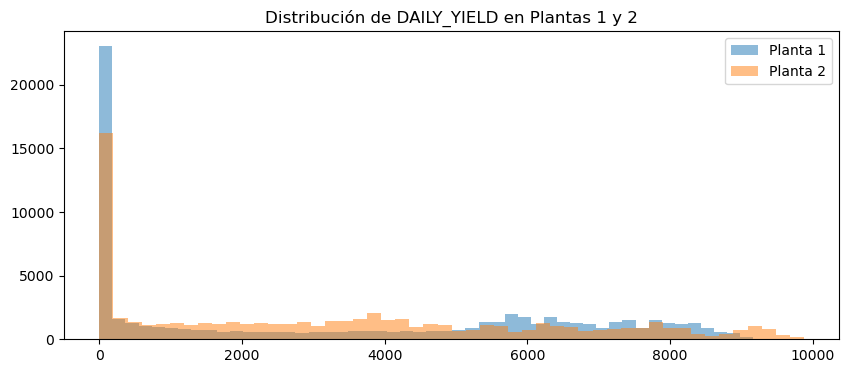

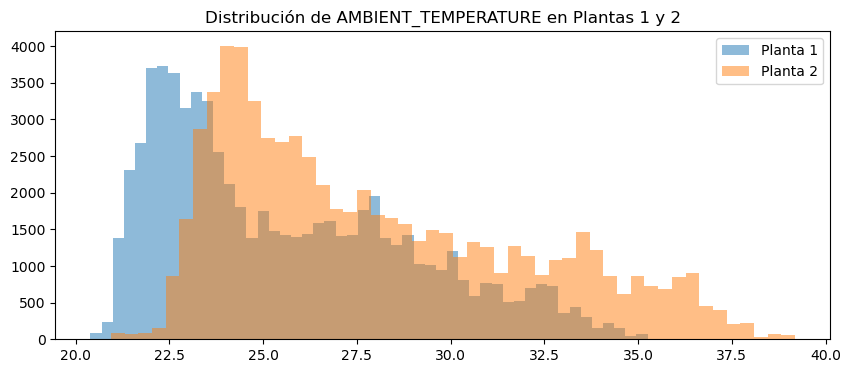

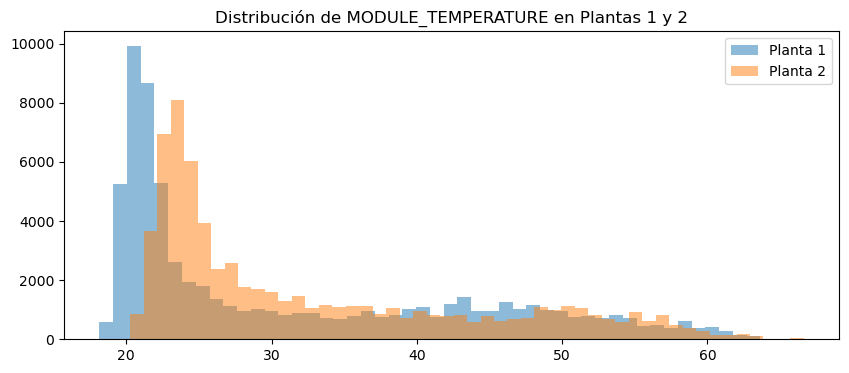

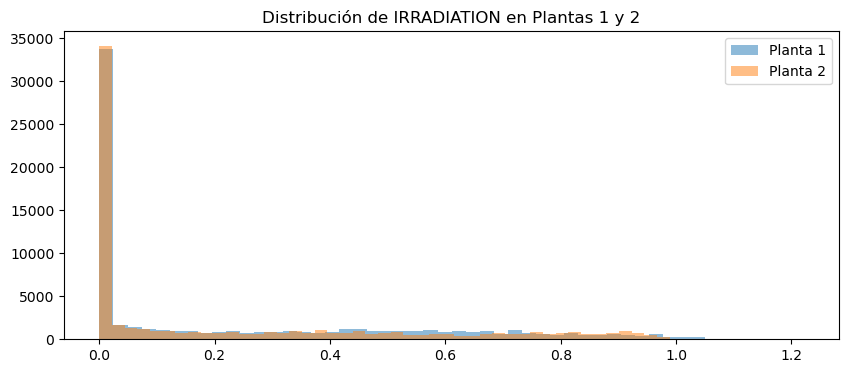

In [ ]:
# Comparar histogramas de características entre las dos plantas
for feature in variables:
    plt.figure(figsize=(10, 4))
    plt.hist(df_SP1_with_weather[feature], bins=50, alpha=0.5, label='Planta 1')
    plt.hist(df_SP2_with_weather[feature], bins=50, alpha=0.5, label='Planta 2')
    plt.title(f'Distribución de {feature} en Plantas 1 y 2')
    plt.legend()
    plt.show()

# Ensamble de Modelos
---

### Carga de modelos y escaladores
- **`load_model()`**: Carga los modelos previamente entrenados desde archivos `.keras`.
  - **`Modelo_SP1`**: Modelo entrenado con datos de la planta 1.
  - **`Modelo_SP2`**: Modelo entrenado con datos de la planta 2.
- **`joblib.load()`**: Carga los escaladores utilizados durante el entrenamiento para normalizar los datos.
  - **`scaler_ker1`**: Escalador para los datos de la planta 1.
  - **`scaler_ker2`**: Escalador para los datos de la planta 2.

---

### Variables definidas
- **`X_ker_1`** y **`X_ker_2`**: Características predictoras de las plantas 1 y 2, respectivamente. Incluyen variables meteorológicas y de generación:
  - **`AMBIENT_TEMPERATURE`**: Temperatura ambiente.
  - **`MODULE_TEMPERATURE`**: Temperatura del módulo solar.
  - **`IRRADIATION`**: Nivel de radiación solar incidente.
  - **`DAILY_YIELD`** y **`TOTAL_YIELD`**: Energía generada acumulada diaria y total.
- **`Y`**: Variable objetivo (`DC_POWER`), que representa la potencia de corriente continua generada por las plantas.

---

### División en entrenamiento y prueba
- **`train_test_split()`**: Divide los datos de cada planta en conjuntos de entrenamiento y prueba.
  - **`test_size=0.2`**: El 20% de los datos se reserva para pruebas.
  - **`random_state=42`**: Garantiza la reproducibilidad.
- Resultados de la división:
  - **Planta 1**:
    - **`X_train_plant1`**, **`X_test_plant1`**: Conjuntos de características para entrenamiento y prueba.
    - **`Y_train_plant1`**, **`Y_test_plant1`**: Conjuntos de valores objetivo para entrenamiento y prueba.
  - **Planta 2**:
    - **`X_train_plant2`**, **`X_test_plant2`**: Conjuntos de características para entrenamiento y prueba.
    - **`Y_train_plant2`**, **`Y_test_plant2`**: Conjuntos de valores objetivo para entrenamiento y prueba.

---

### Función de ensamble de predicciones
- **Objetivo**: Combinar las predicciones de ambos modelos para mejorar la precisión y generalización.
- **`predict_ensemble()`**:
  - **Ajuste de tamaños**: Garantiza que los conjuntos de datos de ambas plantas tengan el mismo número de muestras.
  - **Escalado**: Aplica los escaladores correspondientes (**`scaler_ker1`** y **`scaler_ker2`**) para normalizar los datos.
  - **Predicción**:
    - **`Modelo_SP1`**: Genera predicciones para los datos de la planta 1.
    - **`Modelo_SP2`**: Genera predicciones para los datos de la planta 2.
  - **Ensamble**:
    - Promedia las predicciones de ambos modelos para generar una predicción final combinada.

In [ ]:
# Cargar los modelos y escaladores de cada planta
Modelo_SP1 = load_model('Modelo_SP1.keras')
scaler_ker1 = joblib.load('scaler_ker1.pkl')

Modelo_SP2 = load_model('Modelo_SP2.keras')
scaler_ker2 = joblib.load('scaler_ker2.pkl')

# Definir X (variables predictoras) y Y (variable objetivo)
X_ker_1 = df_SP1_with_weather[variables].values
X_ker_2 = df_SP2_with_weather[variables].values

# Planta 1: Divide en entrenamiento y prueba
X_train_plant1, X_test_plant1, Y_train_plant1, Y_test_plant1 = train_test_split(X_ker_1, df_SP1_with_weather['DC_POWER'].values, 
                                                                                test_size=0.2, random_state=42)

# Planta 2: Divide en entrenamiento y prueba
X_train_plant2, X_test_plant2, Y_train_plant2, Y_test_plant2 = train_test_split(X_ker_2, df_SP2_with_weather['DC_POWER'].values, 
                                                                                test_size=0.2, random_state=42)

# Función para realizar el ensamble
def predict_ensemble(X_ker_1, X_ker_2):
    min_samples = min(len(X_ker_1), len(X_ker_2))
    X_ker_1_sub = X_ker_1[:min_samples]
    X_ker_2_sub = X_ker_2[:min_samples]
    
    # Escalar y predecir con cada modelo
    X_plant1_scaled = scaler_ker1.transform(X_ker_1_sub)
    X_plant2_scaled = scaler_ker2.transform(X_ker_2_sub)
    
    pred_plant1 = Modelo_SP1.predict(X_plant1_scaled)
    pred_plant2 = Modelo_SP2.predict(X_plant2_scaled)
    
    # Ensamble (promedio de las predicciones)
    combined_prediction = (pred_plant1 + pred_plant2) / 2
    
    return combined_prediction


# Ejemplo de predicción
# X_test_plant1 y X_test_plant2 son las características de prueba de cada planta
Y_pred_ensemble = predict_ensemble(X_test_plant1, X_test_plant2)


424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step


# Evaluación del Modelo Ensamblado
---

### Selección del tamaño mínimo de muestras
- **`min_samples`**: Calcula el tamaño mínimo entre las muestras disponibles en los conjuntos de prueba de ambas plantas:
  - Esto asegura que los datos de ambas plantas tengan el mismo número de muestras para realizar comparaciones justas.
  - **`X_test_plant1_sub`** y **`X_test_plant2_sub`**: Subconjuntos de características seleccionados según el número mínimo de muestras.

---

### Escalado de subconjuntos
- **Escaladores**: Los datos seleccionados se normalizan utilizando los escaladores correspondientes a cada planta:
  - **`X_test_plant1_scaled`**: Conjunto escalado de la planta 1.
  - **`X_test_plant2_scaled`**: Conjunto escalado de la planta 2.
- Este paso asegura que los valores estén en la misma escala utilizada durante el entrenamiento de los modelos.

---

### Promedio de valores reales
- **`Y_test_combined`**: Promedio de los valores reales (`DC_POWER`) de las plantas 1 y 2:
  - Este promedio sirve como referencia para evaluar las predicciones del modelo ensamblado.

---

### Cálculo de métricas de rendimiento
- **`mean_squared_error` (MSE)**:
  - Mide el error cuadrático medio entre las predicciones del modelo ensamblado y los valores reales combinados.
  - Penaliza más los errores grandes, siendo útil para identificar desviaciones significativas.
- **`mean_absolute_error` (MAE)**:
  - Calcula el error absoluto promedio entre las predicciones y los valores reales.
  - Representa un promedio de cuánto se desvía el modelo ensamblado de los valores reales combinados.
- **`r2_score` (R²)**:
  - Mide qué tan bien las predicciones se ajustan a los valores reales combinados.
  - Un valor cercano a 1 indica un buen ajuste.

In [ ]:
min_samples = min(len(X_test_plant1), len(X_test_plant2))

# Reducir ambas matrices a un número común de muestras
X_test_plant1_sub = X_test_plant1[:min_samples]
X_test_plant2_sub = X_test_plant2[:min_samples]

# Escalar los subconjuntos
X_test_plant1_scaled = scaler_ker1.transform(X_test_plant1_sub)
X_test_plant2_scaled = scaler_ker2.transform(X_test_plant2_sub)

# Seleccionar el tamaño mínimo de muestras entre ambas plantas
min_samples = min(len(Y_test_plant1), len(Y_test_plant2))
Y_test_plant1_sub = Y_test_plant1[:min_samples]
Y_test_plant2_sub = Y_test_plant2[:min_samples]

# Promediar los valores reales de ambas plantas para comparar con el ensamble
Y_test_combined = (Y_test_plant1_sub + Y_test_plant2_sub) / 2

# Calcular métricas de rendimiento
mse = mean_squared_error(Y_test_combined, Y_pred_ensemble)
mae = mean_absolute_error(Y_test_combined, Y_pred_ensemble)
r2 = r2_score(Y_test_combined, Y_pred_ensemble)

print("Resultados del modelo ensamblado:")
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

Resultados del modelo ensamblado:
MSE: 76237.74916657894
MAE: 120.1833731795237
R²: 0.9812940397326544
